<a href="https://colab.research.google.com/github/warrengmartin/Emotion_StoryTelling/blob/Dev/EAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/warrengmartin/Emotion_StoryTelling.git

Cloning into 'Emotion_StoryTelling'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), done.


In [3]:
import os
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import opinion_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load model and tokenizer
model_name = "SamLowe/roberta-base-go_emotions"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [4]:
def stopWordColumn(text, info=False):
    if info == True:
        print(' example call == df["New_column" for converted "text"] = df["text"].apply(stopWordColumn)')

    stop_W = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in (stop_W)])

def wordSplitter(text, info=False):
    if info == True and text == None:
        print(""" example call == df['text_C'].apply(wordSplitter)""")

    word = []
    letter = []
    letters = []
    if text:
        word_count = 0
        for w in text.split():
            letter_count = 0
            for l in w:
                word.append(word_count)
                letter.append(letter_count)
                letters.append(l)
                letter_count += 1
            word_count += 1

    # Create DataFrame directly without flattening
    df_new = pd.DataFrame({'word': word, 'letter': letter, 'letters': letters})


    return df_new

def callGoEmotions(text, info=False):
    if info == True:
        print("""example call == df['emotion'] = df['text_C'].apply(callGoEmotions)""")


    model_outputs = classifier(text)
    # print(model_outputs[-1])

    #turn the dictionary into a date frame with the emotion as the column
    # and the score as the data.
    df_new = pd.DataFrame(model_outputs[-1])
    df_new = df_new.transpose()
    df_new.columns = df_new.iloc[0]
    df_new = df_new[1:]

    return df_new

def analyze_segment_with_lexicon(segment):
    """Analyzes emotions in a text segment using the NRC-WEAL lexicon."""
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(segment)
    emotions = {
        'anger': scores['neg'],
        'anticipation': 0,
        'disgust': scores['neg'],
        'fear': scores['neg'],
        'joy': scores['pos'],
        'sadness': scores['neg'],
        'surprise': 0,
        'trust': scores['pos']
    }
    return pd.DataFrame([emotions])

In [5]:
import nltk
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
from nltk.corpus import opinion_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




# Download necessary NLTK data (do this once)
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')

# Load the GoEmotions model (do this once)


def analyze_segment_with_lexicon(segment):
    """Analyzes emotions in a text segment using the NRC-WEAL lexicon."""
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(segment)
    emotions = {
        'anger': scores['neg'],
        'anticipation': 0,
        'disgust': scores['neg'],
        'fear': scores['neg'],
        'joy': scores['pos'],
        'sadness': scores['neg'],
        'surprise': 0,
        'trust': scores['pos']
    }
    return pd.DataFrame([emotions])

def callGoEmotions(text, info=False):
    if info == True:
        print("""example call == df['emotion'] = df['text_C'].apply(callGoEmotions)""")


    model_outputs = classifier(text)
    # print(model_outputs[-1])

    #turn the dictionary into a date frame with the emotion as the column
    # and the score as the data.
    df_new = pd.DataFrame(model_outputs[-1])
    df_new = df_new.transpose()
    df_new.columns = df_new.iloc[0]
    df_new = df_new[1:]

    return df_new

def normalize_dataframe_rows(df):
    """Normalizes DataFrame values row-wise using MinMaxScaler."""
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)

def analyze_emotional_trajectory(text):
    """Analyzes and visualizes emotion trajectories using GoEmotions and NRC-WEAL."""
    segments = nltk.sent_tokenize(text)

    goemotions_data = []
    lexicon_data = []

    for i, segment in enumerate(segments):
        print(f"Segment {i+1}: {segment}")  # Print the segment number and text
        goemotions_data.append(callGoEmotions(segment))
        lexicon_data.append(analyze_segment_with_lexicon(segment))

    for segment in segments:
        goemotions_data.append(callGoEmotions(segment))
        lexicon_data.append(analyze_segment_with_lexicon(segment))

    all_goemotions_df = pd.concat(goemotions_data, ignore_index=True)
    all_lexicon_df = pd.concat(lexicon_data, ignore_index=True)

    # Create separate figures for GoEmotions and NRC-WEAL
    fig_goemotions = create_emotion_plot(all_goemotions_df, "GoEmotions Analysis", segments)
    fig_lexicon = create_emotion_plot(all_lexicon_df, "NRC-WEAL Lexicon Analysis", segments)

    # Display the figures
    fig_goemotions.show()
    fig_lexicon.show()

def create_emotion_plot(df, title, segments):
    """Creates a plot for emotion trajectories with normalized and non-normalized versions."""
    normalized_df = normalize_dataframe_rows(df.copy())  # Normalize a copy

    fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True,
                            subplot_titles=(f"{title} (Normalized)", f"{title} (Non-Normalized)"))

    for emotion in df.columns:
        fig.add_trace(go.Scatter(x=list(range(len(segments))), y=normalized_df[emotion],
                                 mode='lines', name=emotion), row=1, col=1)
        fig.add_trace(go.Scatter(x=list(range(len(segments))), y=df[emotion],
                                 mode='lines', name=emotion, showlegend=False), row=2, col=1)

    fig.update_layout(xaxis_title="Segment", yaxis_title="Emotion Intensity")
    return fig

# Example usage:
text = """DONALD
Not at the table, Murph.
MURPH
Dad, can you fix this?
COOPER
takes pieces, frowning
What’d you do to my lander?
MURPH
Wasn’t me.
TOM
Lemme guess - your ghost?
MURPH
It knocked it off my shelf. It keeps knocking books off.
TOM
There’s no such things as ghosts, dumb-ass -
COOPER
to Tom
Hey -
MURPH
I looked it up, it’s called a poltergeist.
TOM
Dad, tell her.
COOPER
Murph, you know that’s not scientific.
MURPH
You say science is about admitting what we don’t know.
DONALD
She’s got you there.
COOPER
hands her pieces
Start looking after our stuff."""
analyze_emotional_trajectory(text)

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Segment 1: DONALD
Not at the table, Murph.
Segment 2: MURPH
Dad, can you fix this?
Segment 3: COOPER
takes pieces, frowning
What’d you do to my lander?
Segment 4: MURPH
Wasn’t me.
Segment 5: TOM
Lemme guess - your ghost?
Segment 6: MURPH
It knocked it off my shelf.
Segment 7: It keeps knocking books off.
Segment 8: TOM
There’s no such things as ghosts, dumb-ass -
COOPER
to Tom
Hey -
MURPH
I looked it up, it’s called a poltergeist.
Segment 9: TOM
Dad, tell her.
Segment 10: COOPER
Murph, you know that’s not scientific.
Segment 11: MURPH
You say science is about admitting what we don’t know.
Segment 12: DONALD
She’s got you there.
Segment 13: COOPER
hands her pieces
Start looking after our stuff.


In [ ]:
def normalize_dataframe_rows(df):
    """Normalizes DataFrame values row-wise using MinMaxScaler."""
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)

def create_emotion_heatmap(df, title, segments, time_per_segment=1.0):
    """Creates a heatmap of emotion trajectories over time."""

    emotion_labels = df.columns
    total_duration = len(segments) * time_per_segment
    time_freq = np.linspace(0, total_duration, 100)

    emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))
    for i, emotion_label in enumerate(emotion_labels):
        # Convert emotion values to floats before interpolation
        interp_values = np.interp(time_freq,
                                  np.arange(0, total_duration, time_per_segment),
                                  df[emotion_label].astype(float).values)
        emotion_grid[i, :] = interp_values

    fig = go.Figure(data=go.Heatmap(
                       z=emotion_grid,
                       x=time_freq,
                       y=emotion_labels,
                       colorscale='Viridis',
                       colorbar=dict(title='Emotion Intensity')
    ))

    fig.update_layout(
        title=f'Emotion Heatmap: {title}',
        xaxis_title='Time (seconds)',
        yaxis_title='Emotion',
        yaxis=dict(autorange="reversed")
    )

    return fig

def analyze_emotional_trajectory(text, time_per_segment=1.0):
    """Analyzes and visualizes emotion trajectories."""
    segments = nltk.sent_tokenize(text)

    goemotions_data = []
    lexicon_data = []

    for i, segment in enumerate(segments):
        print(f"Segment {i+1}: {segment}")
        goemotions_data.append(callGoEmotions(segment))
        lexicon_data.append(analyze_segment_with_lexicon(segment))

    all_goemotions_df = pd.concat(goemotions_data, ignore_index=True)
    all_lexicon_df = pd.concat(lexicon_data, ignore_index=True)

    # Create and display heatmaps for both normalized and non-normalized data
    fig_goemotions_norm = create_emotion_heatmap(normalize_dataframe_rows(all_goemotions_df.copy()), "GoEmotions (Normalized)", segments, time_per_segment)
    fig_goemotions_unnorm = create_emotion_heatmap(all_goemotions_df, "GoEmotions (Non-Normalized)", segments, time_per_segment)
    fig_lexicon_norm = create_emotion_heatmap(normalize_dataframe_rows(all_lexicon_df.copy()), "NRC-WEAL (Normalized)", segments, time_per_segment)
    fig_lexicon_unnorm = create_emotion_heatmap(all_lexicon_df, "NRC-WEAL (Non-Normalized)", segments, time_per_segment)

    fig_goemotions_norm.show()
    fig_goemotions_unnorm.show()
    fig_lexicon_norm.show()
    fig_lexicon_unnorm.show()

# Example usage:
text = """This is a longer text. It starts with a neutral tone.
However, things get exciting in the middle! Finally, it ends on a calmer note."""
analyze_emotional_trajectory(text, time_per_segment=100.0)

Segment 1: This is a longer text.
Segment 2: It starts with a neutral tone.
Segment 3: However, things get exciting in the middle!
Segment 4: Finally, it ends on a calmer note.


In [ ]:
import nltk
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
from nltk.corpus import opinion_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from transformers import pipeline
import numpy as np



def normalize_dataframe_rows(df):
    """Normalizes DataFrame values row-wise using MinMaxScaler."""
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)



def analyze_sentiment(text):
    """Analyzes sentiment using VADER and returns a DataFrame."""
    sia = SentimentIntensityAnalyzer()
    segments = nltk.sent_tokenize(text)
    sentiments = []
    for segment in segments:
        scores = sia.polarity_scores(segment)
        sentiments.append({'positive': scores['pos'], 'negative': scores['neg']})
    return pd.DataFrame(sentiments)

def create_sentiment_plot(df, title, segments):
    """Creates a line plot of positive and negative sentiment over segments."""
    fig = go.Figure()
    for sentiment in ['positive', 'negative']:
        fig.add_trace(go.Scatter(x=list(range(len(segments))), y=df[sentiment],
                                 mode='lines', name=sentiment))
    fig.update_layout(title=f"Sentiment Analysis: {title}",
                      xaxis_title="Segment", yaxis_title="Sentiment Intensity")
    fig.show()

def analyze_emotional_trajectory(text, time_per_segment=1.0):
    """Analyzes and visualizes emotion and sentiment trajectories."""
    segments = nltk.sent_tokenize(text)

    goemotions_data = []
    lexicon_data = []
    sentiment_data = []  # List to store sentiment data

    for i, segment in enumerate(segments):
        print(f"Segment {i+1}: {segment}")
        goemotions_data.append(callGoEmotions(segment))
        lexicon_data.append(analyze_segment_with_lexicon(segment))
        sentiment_data.append(analyze_sentiment(segment))  # Analyze sentiment for each segment

    all_goemotions_df = pd.concat(goemotions_data, ignore_index=True)
    all_lexicon_df = pd.concat(lexicon_data, ignore_index=True)
    all_sentiment_df = pd.concat(sentiment_data, ignore_index=True)  # Concatenate sentiment data

    # Create heatmaps for emotions and sentiment
    fig_goemotions_norm = create_emotion_heatmap(normalize_dataframe_rows(all_goemotions_df.copy()), "GoEmotions (Normalized)", segments, time_per_segment)
    fig_goemotions_unnorm = create_emotion_heatmap(all_goemotions_df, "GoEmotions (Non-Normalized)", segments, time_per_segment)
    fig_lexicon_norm = create_emotion_heatmap(normalize_dataframe_rows(all_lexicon_df.copy()), "NRC-WEAL (Normalized)", segments, time_per_segment)
    fig_lexicon_unnorm = create_emotion_heatmap(all_lexicon_df, "NRC-WEAL (Non-Normalized)", segments, time_per_segment)
    fig_sentiment_norm = create_emotion_heatmap(normalize_dataframe_rows(all_sentiment_df.copy()), "VADER Sentiment (Normalized)", segments, time_per_segment)
    fig_sentiment_unnorm = create_emotion_heatmap(all_sentiment_df, "VADER Sentiment (Non-Normalized)", segments, time_per_segment)

    # Show the heatmaps
    fig_goemotions_norm.show()
    fig_goemotions_unnorm.show()
    fig_lexicon_norm.show()
    fig_lexicon_unnorm.show()
    fig_sentiment_norm.show()
    fig_sentiment_unnorm.show()




text = """DONALD
Not at the table, Murph.
MURPH
Dad, can you fix this?
COOPER
takes pieces, frowning
What’d you do to my lander?
MURPH
Wasn’t me.
TOM
Lemme guess - your ghost?
MURPH
It knocked it off my shelf. It keeps knocking books off.
TOM
There’s no such things as ghosts, dumb-ass -
COOPER
to Tom
Hey -
MURPH
I looked it up, it’s called a poltergeist.
TOM
Dad, tell her.
COOPER
Murph, you know that’s not scientific.
MURPH
You say science is about admitting what we don’t know.
DONALD
She’s got you there.
COOPER
hands her pieces
Start looking after our stuff."""
analyze_emotional_trajectory(text, time_per_segment=2.0)

Segment 1: DONALD
Not at the table, Murph.
Segment 2: MURPH
Dad, can you fix this?
Segment 3: COOPER
takes pieces, frowning
What’d you do to my lander?
Segment 4: MURPH
Wasn’t me.
Segment 5: TOM
Lemme guess - your ghost?
Segment 6: MURPH
It knocked it off my shelf.
Segment 7: It keeps knocking books off.
Segment 8: TOM
There’s no such things as ghosts, dumb-ass -
COOPER
to Tom
Hey -
MURPH
I looked it up, it’s called a poltergeist.
Segment 9: TOM
Dad, tell her.
Segment 10: COOPER
Murph, you know that’s not scientific.
Segment 11: MURPH
You say science is about admitting what we don’t know.
Segment 12: DONALD
She’s got you there.
Segment 13: COOPER
hands her pieces
Start looking after our stuff.


NameError: name 'create_emotion_heatmap' is not defined

In [ ]:
  text = 'hello world'

In [ ]:
df = pd.DataFrame({'text': [text]})
print(df)


          text
0  hello world


In [ ]:
df['text_C'] = df['text'].apply(stopWordColumn)
print(df)

          text       text_C
0  hello world  hello world


In [ ]:
# Call wordSplitter and concatenate results

# Feature extraction could be letter frequency
# word frequency
df2 = pd.concat(df['text_C'].apply(wordSplitter).tolist(), ignore_index=True)
print(df2)

   word  letter letters
0     0       0       h
1     0       1       e
2     0       2       l
3     0       3       l
4     0       4       o
5     1       0       w
6     1       1       o
7     1       2       r
8     1       3       l
9     1       4       d


In [ ]:
df3 = pd.concat(df['text_C'].apply(callGoEmotions).tolist(), ignore_index=True)
print(df3)

label   neutral  approval annoyance realization excitement admiration  \
0      0.966031  0.010001  0.006834    0.004427   0.003943   0.003865   

label     anger disappointment       joy   disgust  ... gratitude   desire  \
0      0.003229       0.002848  0.002683  0.002529  ...  0.001489  0.00122   

label     love    caring embarrassment     grief     pride nervousness  \
0      0.00122  0.001102      0.000833  0.000541  0.000456    0.000432   

label    relief   remorse  
0      0.000403  0.000381  

[1 rows x 28 columns]


In [ ]:
df4 = pd.concat(df2['letters'].apply(callGoEmotions).tolist(), ignore_index=True)
print(df4.head)

<bound method NDFrame.head of label   neutral  approval annoyance realization disapproval admiration  \
0      0.964942  0.012518  0.007453    0.004632    0.003735    0.00368   
1      0.967581  0.010304  0.007505    0.005148    0.003075   0.002912   
2      0.964847  0.011802  0.008534    0.004684    0.003699   0.004944   
3      0.964847  0.011802  0.008534    0.004684    0.003699   0.004944   
4      0.969248  0.011217  0.008952    0.004943    0.004934   0.003268   
5      0.966794  0.009106  0.009135    0.003944    0.003147   0.003856   
6      0.969248  0.011217  0.008952    0.004943    0.004934   0.003268   
7       0.96935  0.011393  0.008244    0.004981    0.002945   0.004077   
8      0.964847  0.011802  0.008534    0.004684    0.003699   0.004944   
9      0.962403  0.013813  0.006449    0.005784    0.004962   0.002685   

label     anger disappointment   disgust   sadness  ...  surprise gratitude  \
0      0.003285        0.00309  0.002468  0.002316  ...  0.000945  0.000942 

<Axes: xlabel='label'>

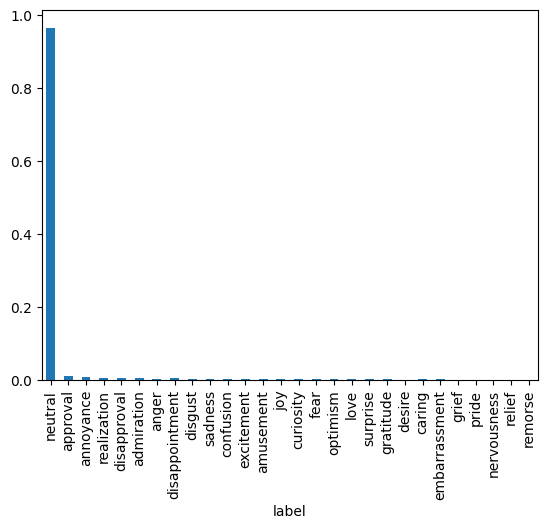

In [ ]:
# prompt: #look at d4 and produce a graph of all emotion for row one.

df4.iloc[2].plot(kind='bar')


In [ ]:
# # use a min max scaler on df4 across rows then put the numbers back in the dataframe
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# #create a min max scaler
# scaler = MinMaxScaler()

# #fit the scaler to the data
# scaler.fit(df4)

# #transform the data
# df5_array = scaler.transform(df4)  # Store the NumPy array result

# # Convert the NumPy array back to a Pandas DataFrame
# df5 = pd.DataFrame(df5_array, columns=df4.columns)  # Assign column names from df4

# print(df5)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe_rows(df):
    """Normalizes the values in each row of a DataFrame using MinMaxScaler.

    Args:
        df (pd.DataFrame): The DataFrame to normalize.

    Returns:
        pd.DataFrame: A new DataFrame with normalized values.
    """

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)  # Fit and transform in one step
    normalized_df = pd.DataFrame(scaled_data, columns=df.columns)
    return normalized_df

df5 = normalize_dataframe_rows(df4)
print(df5)

label   neutral  approval  annoyance  realization  disapproval  admiration  \
0      0.365414  0.724878   0.373866     0.374011     0.391505    0.440692   
1      0.745380  0.254531   0.393111     0.654672     0.064343    0.100452   
2      0.351815  0.572685   0.776415     0.402310     0.373537    1.000000   
3      0.351815  0.572685   0.776415     0.402310     0.373537    1.000000   
4      0.985234  0.448504   0.931943     0.542791     0.985859    0.258125   
5      0.632003  0.000000   1.000000     0.000000     0.099833    0.518378   
6      0.985234  0.448504   0.931943     0.542791     0.985859    0.258125   
7      1.000000  0.485830   0.668324     0.563503     0.000000    0.616293   
8      0.351815  0.572685   0.776415     0.402310     0.373537    1.000000   
9      0.000000  1.000000   0.000000     1.000000     1.000000    0.000000   

label     anger  disappointment   disgust   sadness  ...  surprise  gratitude  \
0      0.298377        0.126611  0.480282  0.715772  ...  0.

<Axes: xlabel='label'>

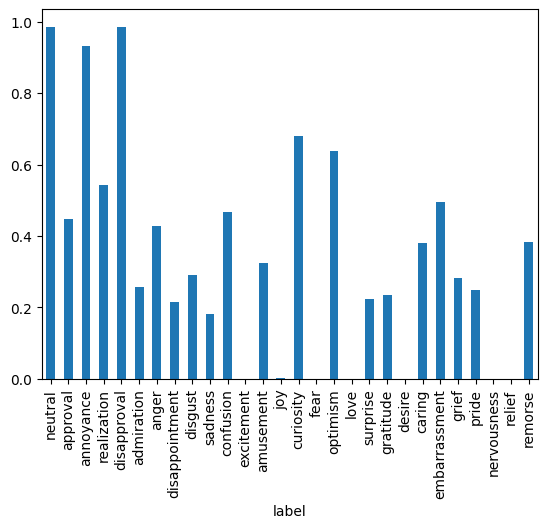

In [ ]:
df5.iloc[4].plot(kind='bar')

In [ ]:



# Assuming you want to plot for a specific word, let's say word 0
word_index = 1

# Extract data for the chosen word
word_data = df2[df2['word'] == word_index]
letters = word_data['letters'].values
emotions = df5.iloc[word_index].values
emotion_labels = df5.columns  # Labels for emotions

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=emotion_labels,
    y=list(range(len(letters))) * len(emotion_labels),  # Repeat letter indices for each emotion
    z=emotions,
    mode='markers',
    marker=dict(

        size=10,
        color=emotions,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Emotion',
        yaxis_title='Letter Index (Time Frequency)',
        zaxis_title='Emotion Value'
    ),
    title=f'Emotions for Word: {"".join(letters)}'
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Assuming df2 and df5 are already defined
word_index = 0

# Extract data for the chosen word
word_data = df2[df2['word'] == word_index]
letters = word_data['letters'].values
emotions = df5.iloc[word_index].values
emotion_labels = df5.columns

# Calculate approximate time for each letter (assuming average speaking rate)
avg_letter_duration = 0.1  # seconds
letter_times = np.cumsum([avg_letter_duration] * len(letters))
total_word_duration = letter_times[-1]

# Create a finer time grid for smoother interpolation
time_freq = np.linspace(0, total_word_duration, 100)

# Initialize the emotion grid
emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))

# Interpolate emotion values over time
for i, emotion in enumerate(emotions):
    # Create a step function for each emotion
    step_func = np.interp(time_freq, letter_times, [emotion] * len(letters))
    emotion_grid[i, :] = step_func

# Add some waviness to the surface
waviness = np.sin(np.outer(np.linspace(0, 2*np.pi, len(emotion_labels)), np.linspace(0, 4*np.pi, len(time_freq))))
emotion_grid += waviness * 0.05  # Adjust the 0.05 factor to increase/decrease waviness

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(
    z=emotion_grid,
    x=time_freq,
    y=np.arange(len(emotion_labels)),
    colorscale='Viridis'
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Time (seconds)',
        yaxis_title='Emotion Index',
        zaxis_title='Emotion Value'
    ),
    title=f'Emotion Surface for Word: {"".join(letters)}',
    # annotations=[
    #     dict(
    #         x=time,
    #         y=-1,  # Slightly below the emotion index axis
    #         z=np.min(emotion_grid),
    #         text=letter,
    #         showarrow=False,
    #         yshift=-10,
    #         font=dict(size=10)
    #     ) for letter, time in zip(letters, letter_times)
    # ] + [
    #     dict(
    #         x=0,
    #         y=i,
    #         z=np.max(emotion_grid),
    #         text=label,
    #         showarrow=False,
    #         xshift=-10,
    #         font=dict(size=10)
    #     ) for i, label in enumerate(emotion_labels)
    # ]
)

# Update color bar
fig.update_traces(colorbar=dict(title='Emotion Intensity'))

fig.show()

In [ ]:
df5

label,neutral,approval,annoyance,realization,disapproval,admiration,anger,disappointment,disgust,sadness,...,surprise,gratitude,desire,caring,embarrassment,grief,pride,nervousness,relief,remorse
0,0.365414,0.724878,0.373866,0.374011,0.391505,0.440692,0.298377,0.126611,0.480282,0.715772,...,0.000000,0.566593,0.114605,0.372163,0.361680,0.504477,0.506962,0.210346,0.330087,0.286499
1,0.745380,0.254531,0.393111,0.654672,0.064343,0.100452,0.406014,0.158229,0.178699,0.713873,...,0.557313,0.219011,0.594851,0.319741,0.479683,0.627618,0.443272,0.889087,0.337918,0.509677
2,0.351815,0.572685,0.776415,0.402310,0.373537,1.000000,0.363896,1.000000,1.000000,1.000000,...,0.379248,1.000000,0.031627,0.665200,1.000000,1.000000,1.000000,0.833889,1.000000,1.000000
3,0.351815,0.572685,0.776415,0.402310,0.373537,1.000000,0.363896,1.000000,1.000000,1.000000,...,0.379248,1.000000,0.031627,0.665200,1.000000,1.000000,1.000000,0.833889,1.000000,1.000000
4,0.985234,0.448504,0.931943,0.542791,0.985859,0.258125,0.428119,0.214623,0.290799,0.182439,...,0.224668,0.234699,0.000000,0.381636,0.496328,0.282105,0.249883,0.000000,0.000000,0.383166
5,0.632003,0.000000,1.000000,0.000000,0.099833,0.518378,1.000000,0.265849,0.787659,0.957453,...,0.459653,0.464760,1.000000,1.000000,0.648300,0.976930,0.685821,1.000000,0.366147,0.611917
6,0.985234,0.448504,0.931943,0.542791,0.985859,0.258125,0.428119,0.214623,0.290799,0.182439,...,0.224668,0.234699,0.000000,0.381636,0.496328,0.282105,0.249883,0.000000,0.000000,0.383166
7,1.000000,0.485830,0.668324,0.563503,0.000000,0.616293,0.667873,0.000000,0.877919,0.479986,...,1.000000,0.165704,0.812297,0.439413,0.786952,0.837922,0.848595,0.577775,0.392637,0.453233
8,0.351815,0.572685,0.776415,0.402310,0.373537,1.000000,0.363896,1.000000,1.000000,1.000000,...,0.379248,1.000000,0.031627,0.665200,1.000000,1.000000,1.000000,0.833889,1.000000,1.000000
9,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.033962,0.000000,0.000000,...,0.138005,0.000000,0.429168,0.000000,0.000000,0.000000,0.000000,0.147405,0.018840,0.000000


In [ ]:
import plotly.graph_objects as go
import numpy as np

word_index = 0

# Extract data for the chosen word
word_data = df2[df2['word'] == word_index]
letters = word_data['letters'].values
emotions = df5.iloc[word_index].values
emotion_labels = df5.columns

# Calculate approximate time for each letter
avg_letter_duration = 0.1
letter_times = np.cumsum([avg_letter_duration] * len(letters))
total_word_duration = letter_times[-1]

# Time grid for the heatmap
time_freq = np.linspace(0, total_word_duration, 100)

# Emotion grid (using linear interpolation)
emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))
for i, emotion_label in enumerate(emotion_labels): # Iterate over emotion labels
    # Linear interpolation for each emotion
    # Use emotion values corresponding to the current emotion label
    interp_values = np.interp(time_freq, letter_times, df5[emotion_label][df2['word'] == word_index].values)
    emotion_grid[i, :] = interp_values

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=emotion_grid,
                   x=time_freq,
                   y=emotion_labels,
                   colorscale='Viridis',
                   colorbar=dict(title='Emotion Intensity')
))

# Add annotations for letters at the top
for i, letter in enumerate(letters):
    fig.add_annotation(
        x=letter_times[i] - avg_letter_duration / 2,  # Center the letter
        y=len(emotion_labels),  # Place above the heatmap
        text=letter,
        showarrow=False,
        font=dict(size=30),
        xref="x",
        yref="y",
        yanchor="bottom"
    )

fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    xaxis_title='Time (seconds)',
    yaxis_title='Emotion',
    yaxis=dict(autorange="reversed")
)

fig.show()

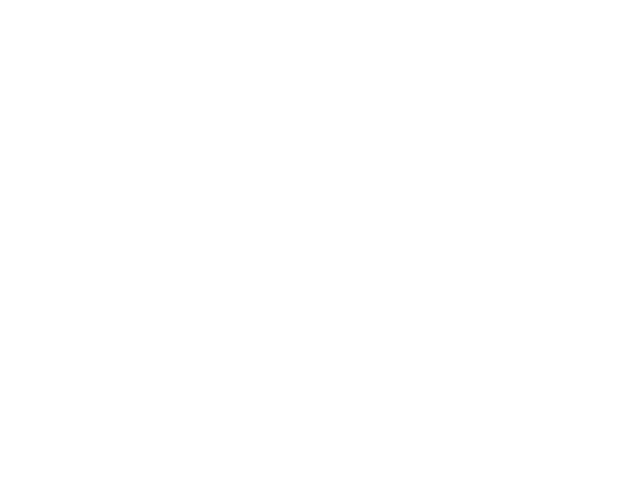

In [ ]:
%matplotlib inline
import matplotlib
import plotly.graph_objects as go
import numpy as np
import colorsys
from plotly.subplots import make_subplots
matplotlib.use('Agg')

emotion_columns = [
    "excitement",
    "neutral",
    "anger",
    "love",
    "optimism",
    "confusion",
    "desire",
    "disgust",
    "admiration",
    "sadness",
    "joy",
    "remorse",
    "approval",
    "annoyance",
    "pride",
    "disapproval",
    "amusement",
    "fear",
    "nervousness",
    "gratitude",
    "grief",
    "disappointment",
    "relief",
    "curiosity",
    "surprise",
    "caring",
    "realization",
    "embarrassment",
]



# Categorize emotions (keeping the same categories as before)
positive_emotions = ["excitement", "love", "optimism", "desire", "admiration", "joy", "approval", "pride", "amusement", "gratitude", "relief", "caring"]
negative_emotions = ["anger", "confusion", "disgust", "sadness", "remorse", "annoyance", "disapproval", "fear", "nervousness", "grief", "disappointment", "embarrassment"]
neutral_emotions = ["neutral", "surprise", "curiosity", "realization"]

# Function to create color scale
def create_color_scale(hue, num_steps=11):
    colors = [colorsys.hsv_to_rgb(hue, 1, v) for v in np.linspace(0.3, 1, num_steps)]
    return [f"rgb({int(r*255)},{int(g*255)},{int(b*255)})" for r, g, b in colors]

# Create unique color scales for each emotion
emotion_colors = {}

# Positive emotions: shades of green to yellow
for i, emotion in enumerate(positive_emotions):
    hue = 0.25 + (i * 0.05)  # Varying shades of green to yellow
    emotion_colors[emotion] = create_color_scale(hue)

# Negative emotions: shades of red to purple
for i, emotion in enumerate(negative_emotions):
    hue = 0.95 + (i * 0.05)  # Varying shades of red to purple
    hue = hue - 1 if hue > 1 else hue  # Wrap around if hue exceeds 1
    emotion_colors[emotion] = create_color_scale(hue)

# Neutral emotions: grayscale
for emotion in neutral_emotions:
    emotion_colors[emotion] = [f"rgb({v},{v},{v})" for v in np.linspace(220, 50, 11)]

# Create custom colorscale
custom_colorscale = [emotion_colors[emotion] for emotion in emotion_columns]

# Flatten the colorscale
custom_colorscale = [item for sublist in custom_colorscale for item in sublist]

# Create the main heatmap figure
fig = make_subplots(rows=1, cols=2, column_widths=[0.8, 0.2],
                    subplot_titles=("Emotion Heatmap", "Intensity Scales"))

# Add the main heatmap
fig.add_trace(go.Heatmap(
    z=emotion_grid,
    x=time_freq,
    y=emotion_labels,
    colorscale=custom_colorscale,
    showscale=False
), row=1, col=1)

# Add annotations for letters at the top
for i, letter in enumerate(letters):
    fig.add_annotation(
        x=letter_times[i] - avg_letter_duration / 2,
        y=len(emotion_labels),
        text=letter,
        showarrow=False,
        font=dict(size=50),
        xref="x",
        yref="y",
        yanchor="bottom"
    )

# Add separate color scales for each emotion
for i, emotion in enumerate(emotion_labels):
    y_position = 1 - (i / len(emotion_labels))
    fig.add_trace(go.Heatmap(
        z=[[0, 1]],
        colorscale=[[0, emotion_colors[emotion][0]], [1, emotion_colors[emotion][-1]]],
        showscale=True,
        colorbar=dict(
            title=emotion,
            titleside="top",
            thickness=10,
            len=1/len(emotion_labels),
            yanchor="bottom",
            y=y_position,
            tickvals=[0, 1],
            ticktext=["Low", "High"]
        )
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    height=800,  # Adjust this value to fit your needs
    width=1200,  # Adjust this value to fit your needs
)

fig.update_xaxes(title_text="Time (seconds)", row=1, col=1)
fig.update_yaxes(title_text="Emotion", row=1, col=1)

# Display the figure in Colab
from plotly.io import show
show(fig)

from IPython.display import display, Image
# display(Image(filename='output.png'))

plt.savefig('emotion_heatmap.png')
from IPython.display import Image
Image('emotion_heatmap.png')

In [ ]:

import plotly.graph_objects as go
import numpy as np
import colorsys

word_index = 0

# Extract data for the chosen word
word_data = df2[df2['word'] == word_index]
letters = word_data['letters'].values
emotions = df5.iloc[word_index].values
emotion_labels = df5.columns

# Calculate approximate time for each letter
avg_letter_duration = 0.1
letter_times = np.cumsum([avg_letter_duration] * len(letters))
total_word_duration = letter_times[-1]

# Time grid for the heatmap
time_freq = np.linspace(0, total_word_duration, 100)
# Categorize emotions
positive_emotions = ["excitement", "love", "optimism", "desire", "admiration",
                    "joy", "approval", "pride", "amusement", "gratitude", "relief", "caring"]
negative_emotions = ["anger", "confusion", "disgust", "sadness", "remorse",
                    "annoyance", "disapproval", "fear", "nervousness", "grief",
                    "disappointment", "embarrassment"]
neutral_emotions = ["neutral", "surprise", "curiosity", "realization"]

# Create color scales for each category
def create_color_scale(hue, num_steps=100):
    colors = [colorsys.hsv_to_rgb(hue, 1, v) for v in np.linspace(0.3, 1, num_steps)]
    return [[i / (num_steps - 1), f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"] for i, (r, g, b) in enumerate(colors)]

# Assign color scales to emotions
emotion_colorscales = {}
for i, emotion in enumerate(positive_emotions):
    emotion_colorscales[emotion] = create_color_scale(0.25 + (i * 0.05)) # Greens to yellows

for i, emotion in enumerate(negative_emotions):
    hue = 0.95 + (i * 0.05)
    hue = hue - 1 if hue > 1 else hue
    emotion_colorscales[emotion] = create_color_scale(hue)  # Reds to purples

for emotion in neutral_emotions:
    emotion_colorscales[emotion] = create_color_scale(0, num_steps=100)  # Grayscale

# --- Create a unified colorscale for the heatmap ---
colorscale = []
emotion_mapping = {}  # To map emotions to their colorscale range

start_index = 0
for emotion in emotion_labels:
    num_steps = len(emotion_colorscales[emotion])
    end_index = start_index + num_steps

    # Add the emotion's colorscale to the unified colorscale
    colorscale.extend(emotion_colorscales[emotion])

    # Map the emotion to its range in the unified colorscale
    emotion_mapping[emotion] = (start_index / len(colorscale), end_index / len(colorscale))

    start_index = end_index

# --- Normalize emotion_grid values and map to colorscale indices ---
normalized_emotion_grid = np.zeros_like(emotion_grid)
for i, emotion in enumerate(emotion_labels):
    start, end = emotion_mapping[emotion]
    normalized_emotion_grid[i] = (emotion_grid[i] - emotion_grid[i].min()) / (emotion_grid[i].max() - emotion_grid[i].min())  # Normalize to 0-1
    normalized_emotion_grid[i] = start + normalized_emotion_grid[i] * (end - start)  # Map to the emotion's colorscale range

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=normalized_emotion_grid,  # Use the normalized grid with actual values
    x=time_freq,
    y=emotion_labels,
    colorscale=colorscale,  # Use the unified colorscale
    colorbar=dict(title='Emotion Intensity')
))

# ... [Add letter annotations as before] ...

fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    xaxis_title='Time (seconds)',
    yaxis_title='Emotion',
    yaxis=dict(autorange="reversed")
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

word_index = 0

# Extract data for the chosen word
word_data = df2[df2['word'] == word_index]
letters = word_data['letters'].values
emotions = df5.iloc[word_index].values
emotion_labels = df5.columns

# Calculate approximate time for each letter
avg_letter_duration = 0.1
letter_times = np.cumsum([avg_letter_duration] * len(letters))
total_word_duration = letter_times[-1]

# Time grid for the heatmap
time_freq = np.linspace(0, total_word_duration, 100)

# Emotion grid (using linear interpolation)
emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))
for i, emotion_label in enumerate(emotion_labels): # Iterate over emotion labels
    # Linear interpolation for each emotion
    # Use emotion values corresponding to the current emotion label
    interp_values = np.interp(time_freq, letter_times, df5[emotion_label][df2['word'] == word_index].values)
    emotion_grid[i, :] = interp_values

# Create a custom color scale with red for negative, green for positive, blue for neutral
# Define a custom color scale
colors = [
    [0, 'rgb(165,0,38)'],       # Dark red
    [0.3, 'rgb(255,0,0)'],       # Red
    [0.4, 'rgb(255,255,0)'],     # Yellow (Neutral)
    [0.6, 'rgb(0, 255, 0)'],     # Green
    [1, 'rgb(0, 128, 0)']       # Dark green
]

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=emotion_grid,
                   x=time_freq,
                   y=emotion_labels,
                   colorscale=colors,
                   colorbar=dict(title='Emotion Intensity')
))

# Add annotations for letters at the top
for i, letter in enumerate(letters):
    fig.add_annotation(
        x=letter_times[i] - avg_letter_duration / 2,  # Center the letter
        y=len(emotion_labels),  # Place above the heatmap
        text=letter,
        showarrow=False,
        font=dict(size=50),
        xref="x",
        yref="y",
        yanchor="bottom"
    )

fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    xaxis_title='Time (seconds)',
    yaxis_title='Emotion',
    yaxis=dict(autorange="reversed"), # Reverse y-axis
    height=700  # Adjust height to accommodate all emotions
)

fig.show()

In [ ]:
# Initialize emotion_grid with zeros (neutral state)
emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))

# Emotion Flow - Start with a neutral state
current_emotion_state = np.zeros(len(emotion_labels))

# Iterate through each letter and update emotional state
for i, letter in enumerate(letters):
    letter_start_time = letter_times[i] - avg_letter_duration
    letter_end_time = letter_times[i]

    # Find indices in time_freq that fall within the letter's duration
    time_indices = np.where((time_freq >= letter_start_time) & (time_freq < letter_end_time))[0]

    # Get the emotion values for the current letter from df5
    letter_emotions = df5.iloc[word_index].values

    # Update the current_emotion_state - you'll need to define how!
    # Example:  Averaging with previous state
    current_emotion_state = (current_emotion_state + letter_emotions) / 2

    # Assign the updated emotional state to the emotion_grid for the letter's duration
    emotion_grid[:, time_indices] = current_emotion_state[:, np.newaxis] # Match dimensions


# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(
    z=emotion_grid,
    x=time_freq,
    y=np.arange(len(emotion_labels)),
    colorscale='Viridis'
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Time (seconds)',
        yaxis_title='Emotion Index',
        zaxis_title='Emotion Value'
    ),
    title=f'Emotion Surface for Word: {"".join(letters)}',
    # annotations=[
    #     dict(
    #         x=time,
    #         y=-1,  # Slightly below the emotion index axis
    #         z=np.min(emotion_grid),
    #         text=letter,
    #         showarrow=False,
    #         yshift=-10,
    #         font=dict(size=10)
    #     ) for letter, time in zip(letters, letter_times)
    # ] + [
    #     dict(
    #         x=0,
    #         y=i,
    #         z=np.max(emotion_grid),
    #         text=label,
    #         showarrow=False,
    #         xshift=-10,
    #         font=dict(size=10)
    #     ) for i, label in enumerate(emotion_labels)
    # ]
)

# Update color bar
fig.update_traces(colorbar=dict(title='Emotion Intensity'))

fig.show()


# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=emotion_grid,
                   x=time_freq,
                   y=emotion_labels,
                   colorscale=colors,
                   colorbar=dict(title='Emotion Intensity')
))

# Add annotations for letters at the top
for i, letter in enumerate(letters):
    fig.add_annotation(
        x=letter_times[i] - avg_letter_duration / 2,  # Center the letter
        y=len(emotion_labels),  # Place above the heatmap
        text=letter,
        showarrow=False,
        font=dict(size=50),
        xref="x",
        yref="y",
        yanchor="bottom"
    )

fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    xaxis_title='Time (seconds)',
    yaxis_title='Emotion',
    yaxis=dict(autorange="reversed"), # Reverse y-axis
    height=700  # Adjust height to accommodate all emotions
)

fig.show()

In [ ]:
def update_emotion_state(current_emotion_state, letter_emotions, alpha=0.5):
    """
    Update the current emotion state based on the previous state and the current letter's emotions.

    Parameters:
    current_emotion_state (float): The emotion state of the previous letter.
    letter_emotions (float): The emotion state of the current letter.
    alpha (float): The weight given to the current letter's emotions (0 <= alpha <= 1).

    Returns:
    float: The updated emotion state.
    """
    return alpha * letter_emotions + (1 - alpha) * current_emotion_state

# Example usage
current_emotion_state = 10.0  # Initial emotion state
letter_emotions = [0.2, 0.5, -0.3, 0.8]  # Emotion values for each letter in the word

for emotion in letter_emotions:
    current_emotion_state = update_emotion_state(current_emotion_state, emotion, alpha=0.5)
    print(f"Updated emotion state: {current_emotion_state}")

Updated emotion state: 5.1
Updated emotion state: 2.8
Updated emotion state: 1.25
Updated emotion state: 1.025


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define the update_emotion_state function
def update_emotion_state(current_emotion_state, letter_emotions, alpha=0.5):
    """
    Update the current emotion state based on the previous state and the current letter's emotions.

    Parameters:
    current_emotion_state (np.ndarray): The emotion state of the previous letter.
    letter_emotions (np.ndarray): The emotion state of the current letter.
    alpha (float): The weight given to the current letter's emotions (0 <= alpha <= 1).

    Returns:
    np.ndarray: The updated emotion state.
    """
    return alpha * letter_emotions + (1 - alpha) * current_emotion_state

# Initialize emotion_grid with zeros (neutral state)
emotion_grid = np.zeros((len(emotion_labels), len(time_freq)))

# Emotion Flow - Start with a neutral state
current_emotion_state = np.zeros(len(emotion_labels))

# Iterate through each letter and update emotional state
for i, letter in enumerate(letters):
    letter_start_time = letter_times[i] - avg_letter_duration
    letter_end_time = letter_times[i]

    # Find indices in time_freq that fall within the letter's duration
    time_indices = np.where((time_freq >= letter_start_time) & (time_freq < letter_end_time))[0]

    # Get the emotion values for the current letter from df5
    letter_emotions = df5.iloc[word_index].values

    # Update the current_emotion_state using the weighted average function
    current_emotion_state = update_emotion_state(current_emotion_state, letter_emotions, alpha=0.5)

    # Assign the updated emotional state to the emotion_grid for the letter's duration
    emotion_grid[:, time_indices] = current_emotion_state[:, np.newaxis] # Match dimensions

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=emotion_grid,
                   x=time_freq,
                   y=emotion_labels,
                   colorscale=colors,
                   colorbar=dict(title='Emotion Intensity')
))

# Add annotations for letters at the top
for i, letter in enumerate(letters):
    fig.add_annotation(
        x=letter_times[i] - avg_letter_duration / 2,  # Center the letter
        y=len(emotion_labels),  # Place above the heatmap
        text=letter,
        showarrow=False,
        font=dict(size=50),
        xref="x",
        yref="y",
        yanchor="bottom"
    )

fig.update_layout(
    title=f'Emotion Heatmap for Word: {"".join(letters)}',
    xaxis_title='Time (seconds)',
    yaxis_title='Emotion',
    yaxis=dict(autorange="reversed"), # Reverse y-axis
    height=700  # Adjust height to accommodate all emotions
)

fig.show()

# Ideas


Word Effect Intensities: https://saifmohammad.com/WebDocs/lrec2018-paper-word-emotion.pdf

Go Emotion Set

wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv

wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv

wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv


Do some Data Analysis on the Corpus
Find overlapping emotions or phrases with multiple emotions associated with in it.

Map emotions on a cordinent plane or emotion wheel assocaited with color ranges.

In [ ]:


import os
import pandas as pd
def create_GoEmotion_dataframes():
    GOEMOTIONS_URL = 'https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/'
    goList = [f'{GOEMOTIONS_URL}goemotions_{i+1}.csv' for i in range(3)]
    dataframes = []

    for i, url in enumerate(goList):
        file_path = f'data/full_dataset/goemotions_{i+1}.csv'
        if not os.path.exists(file_path):
            print(f'Installing {file_path}')
            os.makedirs(os.path.dirname(file_path), exist_ok=True)
            !wget -P data/full_dataset/ $url

            df = pd.read_csv(file_path)
            dataframes.append(df)
        else:
            print(f'{file_path} already exists. Skipping download.')

        df = pd.read_csv(file_path)
        dataframes.append(df)

    for df in dataframes:
        df.drop(df.columns[1:9], axis=1, inplace=True)

    df1, df2, df3 = dataframes
    return df1, df2, df3


In [ ]:
train_df, val_df, test_df = create_GoEmotion_dataframes()

Installing data/full_dataset/goemotions_1.csv
--2024-08-01 12:12:30--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 142.250.152.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  69.5MB/s    in 0.2s    

2024-08-01 12:12:31 (69.5 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

Installing data/full_dataset/goemotions_2.csv
--2024-08-01 12:12:32--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 142.250.152.207, 172.217.214.207, ...
Connecting to storage.googleap

ValueError: too many values to unpack (expected 3)

In [ ]:
train_df.shape

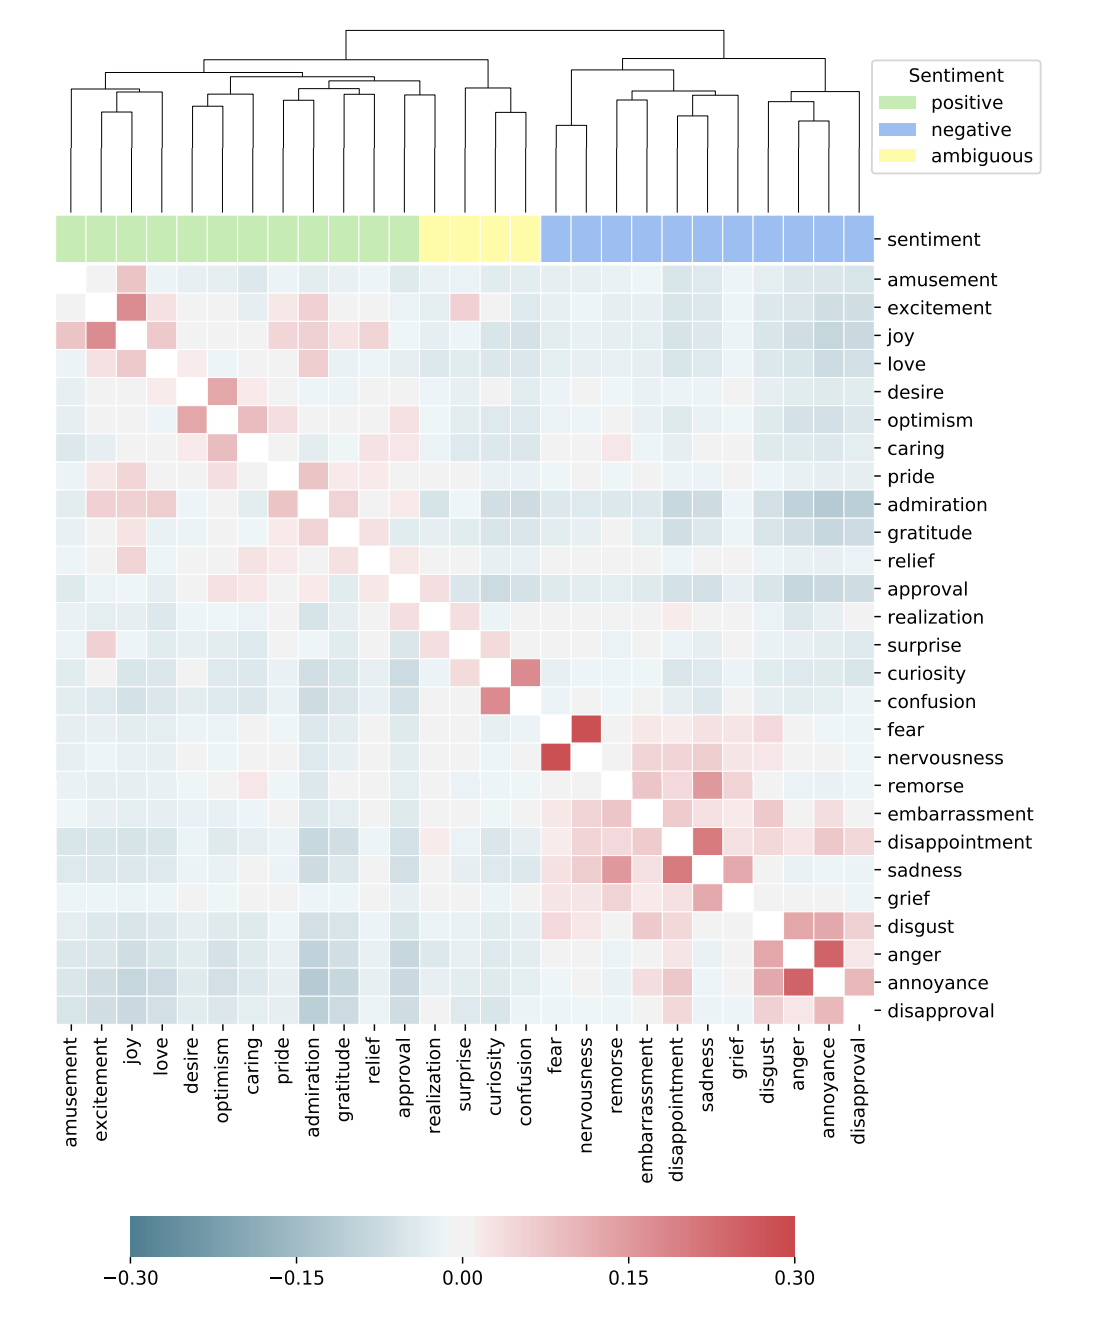

In [ ]:
# Calculate the correlation matrix


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df5.corr()

# Create a clustered heatmap
sns.clustermap(correlation_matrix,
               annot=False,        # Optionally display values with annot=True
               cmap='coolwarm',   # Choose a different color palette if you like
               figsize=(10, 10))  # Adjust figure size

plt.title("Emotion Correlation Matrix")
plt.show()

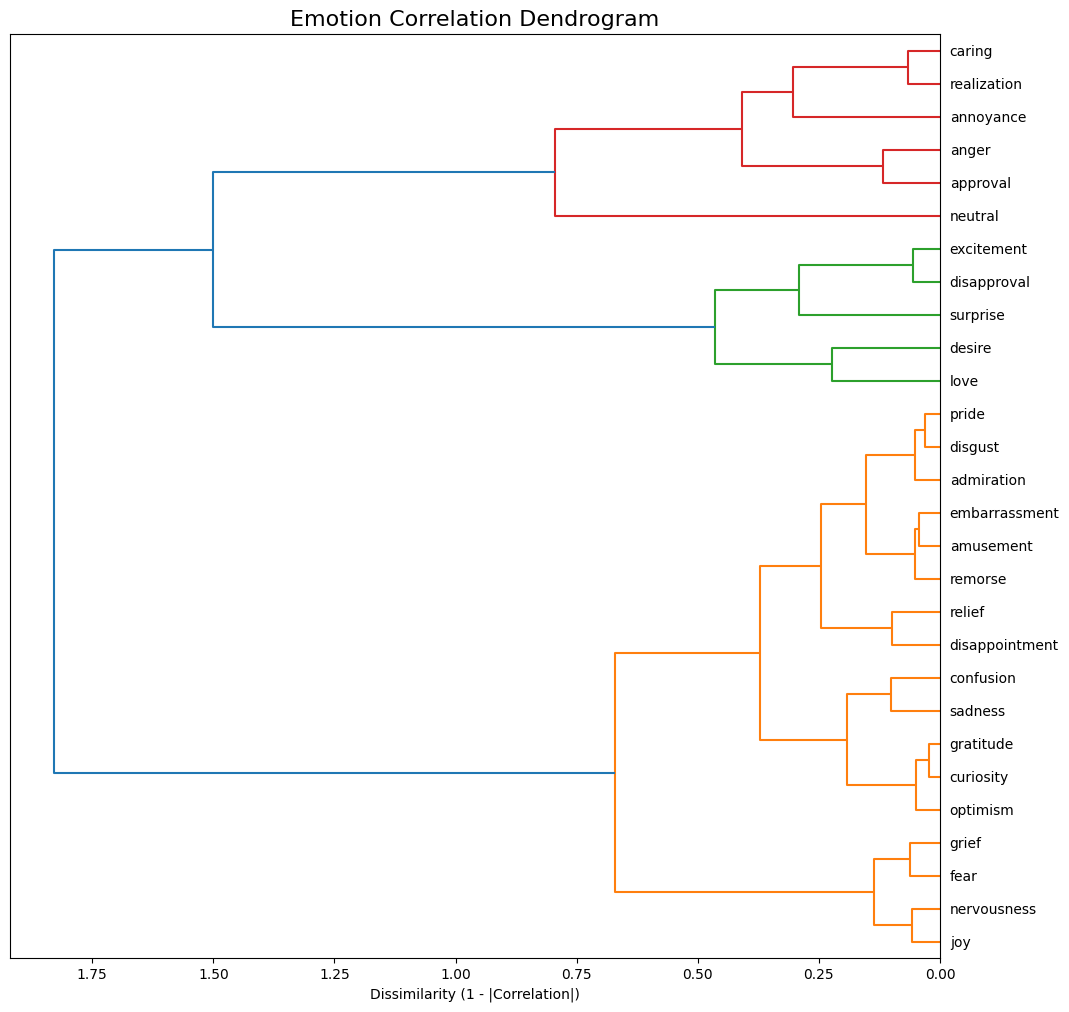

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Assuming df5 is your DataFrame with emotion columns

# Calculate the correlation matrix
correlation_matrix = df5.corr()

# Since we want to visualize dissimilarity (1 - correlation), convert correlation to distance
dissimilarity = 1 - correlation_matrix.abs()

# Convert the dissimilarity matrix to a condensed distance matrix (required for linkage)
condensed_dissimilarity = squareform(dissimilarity)

# Perform hierarchical clustering using Ward's method
linkage_matrix = hierarchy.linkage(condensed_dissimilarity, method='ward')

# Create the radial dendrogram
plt.figure(figsize=(12, 12)) # Adjust figure size as needed
dendrogram = hierarchy.dendrogram(linkage_matrix,
                                   labels=correlation_matrix.columns,
                                   orientation='left',  # Orient labels horizontally
                                   leaf_font_size=10)   # Adjust font size

plt.title("Emotion Correlation Dendrogram", fontsize=16)
plt.xlabel('Dissimilarity (1 - |Correlation|)') # X-axis represents dissimilarity
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/Priya22/EmotionDynamics/master/code/sample_data/sample_input.csv

--2024-07-31 16:21:57--  https://raw.githubusercontent.com/Priya22/EmotionDynamics/master/code/sample_data/sample_input.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13051 (13K) [text/plain]
Saving to: ‘sample_input.csv’

sample_input.csv    100%[===================>]  12.75K  --.-KB/s    in 0.002s  

2024-07-31 16:21:57 (5.76 MB/s) - ‘sample_input.csv’ saved [13051/13051]



In [ ]:
!wget https://github.com/Priya22/EmotionDynamics/raw/master/code/avgEmoValues.py

--2024-07-31 16:41:27--  https://github.com/Priya22/EmotionDynamics/raw/master/code/avgEmoValues.py
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Priya22/EmotionDynamics/master/code/avgEmoValues.py [following]
--2024-07-31 16:41:28--  https://raw.githubusercontent.com/Priya22/EmotionDynamics/master/code/avgEmoValues.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2888 (2.8K) [text/plain]
Saving to: ‘avgEmoValues.py’

avgEmoValues.py     100%[===================>]   2.82K  --.-KB/s    in 0s      

2024-07-31 16:41:28 (31.3 MB/s) - ‘avgEmoValues.py’ saved [2888/2888]



In [ ]:
!python /content/EmotionDynamics/code/avgEmoValues.py --dataPath /content/sample_input.csv --lexPath /content/EmotionDynamics/code/lexicons/NRC-VAD-Lexicon.csv --lexNames valence dominance --savePath /content/sample_data/sample_outputs

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
!git clone https://github.com/Priya22/EmotionDynamics.git /content/EmotionDynamics

Cloning into '/content/EmotionDynamics'...
remote: Enumerating objects: 2723, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 2723 (delta 33), reused 59 (delta 23), pack-reused 2644
Receiving objects: 100% (2723/2723), 1000.20 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (995/995), done.
Updating files: 100% (1214/1214), done.


In [ ]:
# find all the instances of [NAME] in the text column
train_df[train_df['text'].str.contains('NAME')]

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,So happy for [NAME]. So sad he's not here. Ima...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30,but it's [NAME] saying it so sorta disappointing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36,"I can't stand [NAME]. Especially since her ""ta...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,"I just came home, what the fuck is this lineup...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69950,Apartheid would mean full Israeli control of t...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69960,"[NAME] could rebound and still be overpaid, de...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69970,My soul twin must be [NAME] because I’m terrif...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69974,[NAME] best girl,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
